In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [4]:
# Load vehicle list
vehicles = pd.read_csv('vehicle_list.csv')

vehicles.head(10)

,fleet,truck_number,platform_id,vehicle_year,vehicle_make,vehicle_model,date_of_service,dpf_failure
0,Conway,432 3619,309450,2014,Freightliner,Cascadia,1/4/2019,Yes
1,Conway,432 3577,308374,2014,Freightliner,Cascadia,1/9/2019,Yes
2,Conway,426 6337,10315963,2013,Freightliner,Cascadia,1/17/2019,Yes
3,Conway,532 4279,10314364,2014,Freightliner,Cascadia,1/28/2019,Yes
4,Conway,432 3754,307112,2014,Freightliner,Cascadia,2/13/2019,Yes
5,Conway,532 5458,10312983,2015,Freightliner,Cascadia,3/16/2019,Yes
6,Conway,432 3874,308049,2014,Freightliner,Cascadia,3/19/2019,Yes
7,Conway,632 3472,310201,2013,Freightliner,Cascadia,4/9/2019,Yes
8,Conway,432 3721,303576,2014,Freightliner,Cascadia,4/17/2019,Yes
9,Conway,432 2497,302332,2012,Freightliner,Cascadia,4/20/2019,Yes


In [4]:
# How many with and without failures?

vehicles.groupby('dpf_failure').size()

dpf_failure
No     69
Yes    92
dtype: int64

In [5]:
# list of truck id with/without dpf_failure:
dpf_normal = []
dpf_failure = []

for i, e in vehicles.iterrows():
    if(e.dpf_failure == 'No'):
        dpf_normal.append(e.platform_id)
    else:
        dpf_failure.append(e.platform_id)
len(dpf_normal)

69

# Load all data

In [6]:
# Load all data

frames = []

for i, e in vehicles.iterrows():
    try:
        tmp = pd.read_csv('./individual_files/{}_daily_data.csv'.format(e.platform_id))
        del tmp['Unnamed: 0']
        del tmp['platform_id'] # Because iterated from the order of vehicle.platform_id
        frames.append(tmp)
    except:
        None
all_data = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist()) # The order of the vehicle.platform_id is the same as tmp's
all_data.head()

date  distance_miles  fuel_used_gallons  duration_mins  \
309450 0  2019-01-02       65.294602           7.743177     222.002017   
       1  2019-01-03      210.269609          32.266755     519.221017   
       2  2019-01-04       98.413486          15.543700     354.276533   
       3  2019-01-05       74.838556          13.602637     131.153333   
       4  2019-01-06        0.000000           0.000000       0.000000   

          idle_duration_mins  fuel_loss_gallons  \
309450 0           44.141633           0.057875   
       1          134.957617           0.495596   
       2           83.660883           0.281884   
       3           30.391967           0.225600   
       4            0.000000           0.000000   

          dpf_regen_inhibited_duration_mins  \
309450 0                         145.853650   
       1                         293.039250   
       2                         115.026133   
       3                         111.522417   
       4                           0.000000   

          dpf_regen_not_inhibited_duration_mins  \
309450 0                               8.650900   
       1                              51.976683   
       2                              31.087450   
       3                              15.201283   
       4                               0.000000   

          dpf_regen_not_active_duration_mins  dpf_regen_active_duration_mins  \
309450 0                          154.504550                        0.000000   
       1                          345.015933                        0.000000   
       2                           41.469600                       57.857333   
       3                            0.000000                      123.756800   
       4                            0.000000                        0.000000   

          dpf_regen_needed_duration_mins  \
309450 0                         0.00000   
       1                         0.00000   
       2                        46.78665   
       3                         2.96690   
       4                         0.00000   

          dpf_regen_inhibit_switch_not_active_duration_mins  \
309450 0                                                0.0   
       1                                                0.0   
       2                                                0.0   
       3                                                0.0   
       4                                                0.0   

          dpf_regen_inhibit_switch_active_duration_mins  vehicle_serviced  \
309450 0                                            0.0                 0   
       1                                            0.0                 0   
       2                                            0.0                 1   
       3                                            0.0                 0   
       4                                            0.0                 0   

                                  diagnostics_trouble_codes  
309450 0                                                 []  
       1                                                 []  
       2  [{'j1939': {'severity': 'unclassified', 'fmi':...  
       3                                                 []  
       4                                                 []

In [7]:
# Access individual truck's data
i = 6
all_data.loc[vehicles.iloc[i].platform_id,:]

,date,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,dpf_regen_not_active_duration_mins,dpf_regen_active_duration_mins,dpf_regen_needed_duration_mins,dpf_regen_inhibit_switch_not_active_duration_mins,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes
0,2019-01-02,217.980949,37.871273,434.233650,145.732117,1.917883,324.759733,77.856433,402.616167,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
1,2019-01-03,773.847198,120.327110,798.010167,61.251200,4.020485,744.067367,43.865600,787.932967,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
2,2019-01-04,987.012162,146.885554,1063.576433,126.815250,4.584875,976.207150,81.953617,1058.160767,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
3,2019-01-05,555.012699,78.064392,657.412083,109.742633,2.245548,569.853783,81.322317,651.176100,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
4,2019-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2020-12-26,516.927806,58.353431,550.106517,34.822567,1.761332,499.084283,13.900800,512.985083,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
725,2020-12-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,[]
726,2020-12-28,9.300452,3.581737,255.567317,143.504433,0.199219,200.330150,53.070733,253.400883,0.000000,0.000000,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."
727,2020-12-29,464.985080,66.802703,772.607700,217.761367,2.936305,655.783050,97.323467,583.827483,142.843550,26.435483,0.0,0.0,0,"[{'j1939': {'severity': 'unclassified', 'fmi':..."


In [8]:
# Label 14 days before dpf failure as failure.
all_data


date  distance_miles  fuel_used_gallons  duration_mins  \
309450   0   2019-01-02       65.294602           7.743177     222.002017   
         1   2019-01-03      210.269609          32.266755     519.221017   
         2   2019-01-04       98.413486          15.543700     354.276533   
         3   2019-01-05       74.838556          13.602637     131.153333   
         4   2019-01-06        0.000000           0.000000       0.000000   
...                 ...             ...                ...            ...   
10325986 91  2020-12-01      776.873155         102.696680     841.246750   
         92  2020-12-02     1035.033122         131.526101    1138.760183   
         93  2020-12-03     1035.683687         134.032157    1134.956167   
         94  2020-12-04      694.809906          94.907985     798.424467   
         95  2020-12-05       95.052341          13.896183     132.229917   

             idle_duration_mins  fuel_loss_gallons  \
309450   0            44.141633           0.057875   
         1           134.957617           0.495596   
         2            83.660883           0.281884   
         3            30.391967           0.225600   
         4             0.000000           0.000000   
...                         ...                ...   
10325986 91           64.949683           1.103217   
         92           99.233983           1.101833   
         93           87.670717           1.025153   
         94           75.487267           1.080527   
         95           20.191967           0.374806   

             dpf_regen_inhibited_duration_mins  \
309450   0                          145.853650   
         1                          293.039250   
         2                          115.026133   
         3                          111.522417   
         4                            0.000000   
...                                        ...   
10325986 91                         753.899317   
         92                        1003.531917   
         93                        1008.166433   
         94                         686.138833   
         95                         100.253500   

             dpf_regen_not_inhibited_duration_mins  \
309450   0                                8.650900   
         1                               51.976683   
         2                               31.087450   
         3                               15.201283   
         4                                0.000000   
...                                            ...   
10325986 91                              83.089700   
         92                             114.028383   
         93                             110.969883   
         94                             104.916217   
         95                              22.850867   

             dpf_regen_not_active_duration_mins  \
309450   0                           154.504550   
         1                           345.015933   
         2                            41.469600   
         3                             0.000000   
         4                             0.000000   
...                                         ...   
10325986 91                          786.525417   
         92                         1117.560300   
         93                         1119.136317   
         94                          791.055050   
         95                          123.104367   

             dpf_regen_active_duration_mins  dpf_regen_needed_duration_mins  \
309450   0                         0.000000                         0.00000   
         1                         0.000000                         0.00000   
         2                        57.857333                        46.78665   
         3                       123.756800                         2.96690   
         4                         0.000000                         0.00000   
...                                     ...                             ...   
10325986 91                  

In [8]:
# Training example
data_test = all_data[['distance_miles','fuel_used_gallons','duration_mins','idle_duration_mins',
                      'fuel_loss_gallons','dpf_regen_inhibited_duration_mins','dpf_regen_not_inhibited_duration_mins',
                      'dpf_regen_not_active_duration_mins'
                    ]]
data_test.head()

distance_miles  fuel_used_gallons  duration_mins  \
309450 0       65.294602           7.743177     222.002017   
       1      210.269609          32.266755     519.221017   
       2       98.413486          15.543700     354.276533   
       3       74.838556          13.602637     131.153333   
       4        0.000000           0.000000       0.000000   

          idle_duration_mins  fuel_loss_gallons  \
309450 0           44.141633           0.057875   
       1          134.957617           0.495596   
       2           83.660883           0.281884   
       3           30.391967           0.225600   
       4            0.000000           0.000000   

          dpf_regen_inhibited_duration_mins  \
309450 0                         145.853650   
       1                         293.039250   
       2                         115.026133   
       3                         111.522417   
       4                           0.000000   

          dpf_regen_not_inhibited_duration_mins  \
309450 0                               8.650900   
       1                              51.976683   
       2                              31.087450   
       3                              15.201283   
       4                               0.000000   

          dpf_regen_not_active_duration_mins  
309450 0                          154.504550  
       1                          345.015933  
       2                           41.469600  
       3                            0.000000  
       4                            0.000000

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

window_size = 20

def generate_windows(data, ws=window_size, scaler=StandardScaler):
    ll = len(data)
    dd = scaler().fit_transform(data)
    X = []
    y = []
    
    for i in range(0, (ll - ws)):
        X.append(dd[i:i+ws])
        y.append(dd[i:i+ws])
    
    return X, y

def generate_training(data, normal = dpf_normal):
    Xs = []
    Ys = []
    for i in normal: # Add each truck to training data
        X, y = generate_windows(data.loc[i,:])
        Xs = Xs + X
        Ys = Ys + y
    X_tr, X_ts, y_tr, y_ts = [np.array(x) for x in train_test_split(Xs, Ys)]
    assert X_tr.shape[2] == X_ts.shape[2] == data.loc[i:].shape[1]
    return (X_tr, y_tr, X_ts, y_ts)

def generate_testing(data, failure = dpf_failure):
    Xs = []
    Ys = []
    for i in failure: # Add each truck to training data
        X, y = generate_windows(data.loc[i,:])
        Xs = Xs + X
        Ys = Ys + y
    X_tr, X_ts, y_tr, y_ts = [np.array(x) for x in train_test_split(Xs, Ys)]
    assert X_tr.shape[2] == X_ts.shape[2] == data.loc[i:].shape[1]
    return (data.loc[i,:],i,X_tr, y_tr, X_ts, y_ts)

def generate_all_testing(data, failure = dpf_failure):
    Xs = []
    Ys = []
    for i in failure: # Add each truck to training data
        X, y = generate_windows(data.loc[i,:])
        Xs = Xs + X
        Ys = Ys + y
    y1, y2 = [np.array(x) for x in (Xs,Ys)]
    return (y1,y2)
    
def generate_class(a_data, ws = window_size, failure = dpf_failure):
    ll = 0
    dpf_class = []
    
    for i in failure:
        truck_all = a_data.loc[i,:]
        ll = len(truck_all)
        
        
        for j in range(0, (ll-ws)):
#             print(i,j+ws)
#             print(truck_all['Failure'].iloc[j+ws])
            
            if(truck_all['Failure'].iloc[j+ws]==1):
                dpf_class.append(1)
            else:
                dpf_class.append(0)
                
    return dpf_class

In [11]:
# Import tsf data
data_tsf = pd.read_csv('data/full_data_with_dan.csv')

data_tsf.tail(10)

,Unnamed: 0,Unnamed: 1,F2__benford_correlation,F1__benford_correlation,F4__quantile__q_0.6,F4__sum_values,"F4__fft_coefficient__attr_""abs""__coeff_0","F4__fft_coefficient__attr_""real""__coeff_0","F4__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","F4__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)",...,F4__quantile__q_0.8,F4__quantile__q_0.7,"F4__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",F4__quantile__q_0.4,F4__quantile__q_0.2,F4__median,F4__mean,F4__root_mean_square,F4__abs_energy,F4__minimum
111692,10325986,86,0.075189,-0.145280,0.002192,0.002192,0.002192,0.002192,0.000425,0.000601,...,0.002192,0.002192,0.000850,0.002192,0.002192,0.002192,0.002192,0.002192,0.000005,0.002192
111693,10325986,87,0.075189,-0.200946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111694,10325986,88,0.075189,-0.200946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111695,10325986,89,0.075189,-0.200946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111696,10325986,90,0.864123,-0.200946,0.709266,0.709266,0.709266,0.709266,0.137555,0.194532,...,0.709266,0.709266,0.275110,0.709266,0.709266,0.709266,0.709266,0.709266,0.503059,0.709266
111697,10325986,91,-0.145280,-0.200946,0.632689,0.632689,0.632689,0.632689,0.122704,0.173529,...,0.632689,0.632689,0.245407,0.632689,0.632689,0.632689,0.632689,0.632689,0.400295,0.632689
111698,10325986,92,0.075189,-0.272809,0.810300,0.810300,0.810300,0.810300,0.157149,0.222243,...,0.810300,0.810300,0.314299,0.810300,0.810300,0.810300,0.810300,0.810300,0.656585,0.810300
111699,10325986,93,0.075189,-0.272809,0.825739,0.825739,0.825739,0.825739,0.160144,0.226477,...,0.825739,0.825739,0.320287,0.825739,0.825739,0.825739,0.825739,0.825739,0.681845,0.825739
111700,10325986,94,0.075189,-0.200946,0.584704,0.584704,0.584704,0.584704,0.113397,0.160368,...,0.584704,0.584704,0.226795,0.584704,0.584704,0.584704,0.584704,0.584704,0.341879,0.584704
111701,10325986,95,0.075189,0.864123,0.085611,0.085611,0.085611,0.085611,0.016603,0.023481,...,0.085611,0.085611,0.033207,0.085611,0.085611,0.085611,0.085611,0.085611,0.007329,0.085611


In [12]:
def extract_raw(data):
    frames = []
    for i, e in vehicles.iterrows():
        tmp = data[data['platform_id']==e.platform_id]
        try: 
            del tmp['Unnamed: 0']
        except:
            None
        frames.append(tmp)
        
    da = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist()) # The order of the vehicle.platform_id is the same as tmp's
    return data_all

def extract_trainingdf(data):
    frames = []
    for i, e in vehicles.iterrows():
        tmp = data[data['Unnamed: 0']==e.platform_id]
        try: 
            del tmp['Unnamed: 0']
            del tmp['Unnamed: 1']
        except:
            None
        frames.append(tmp)
        
    data_all = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist()) # The order of the vehicle.platform_id is the same as tmp's
    return data_all

In [13]:
data_tsf = extract_trainingdf(data_tsf)

In [165]:
data_tsf.head()

F2__benford_correlation  F1__benford_correlation  \
309450 0                 0.295657                 0.864123   
       1                 0.295657                -0.064614   
       2                 0.864123                 0.062915   
       3                 0.864123                 0.864123   
       4                 0.295657                 0.062915   

          F4__quantile__q_0.6  F4__sum_values  \
309450 0             0.076764        0.076764   
       1             0.319885        0.319885   
       2             0.154097        0.154097   
       3             0.134854        0.134854   
       4             0.000000        0.000000   

          F4__fft_coefficient__attr_"abs"__coeff_0  \
309450 0                                  0.076764   
       1                                  0.319885   
       2                                  0.154097   
       3                                  0.134854   
       4                                  0.000000   

          F4__fft_coefficient__attr_"real"__coeff_0  \
309450 0                                   0.076764   
       1                                   0.319885   
       2                                   0.154097   
       3                                   0.134854   
       4                                   0.000000   

          F4__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)  \
309450 0                                           0.014888            
       1                                           0.062039            
       2                                           0.029885            
       3                                           0.026153            
       4                                           0.000000            

          F4__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  \
309450 0                                           0.021054            
       1                                           0.087736            
       2                                           0.042264            
       3                                           0.036987            
       4                                           0.000000            

          F4__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
309450 0                                           0.047079           
       1                                           0.196183           
       2                                           0.094506           
       3                                           0.082705           
       4                                           0.000000           

          F4__quantile__q_0.9  F4__quantile__q_0.8  F4__quantile__q_0.7  \
309450 0             0.076764             0.076764             0.076764   
       1             0.319885             0.319885             0.319885   
       2             0.154097             0.154097             0.154097   
       3             0.134854             0.134854             0.134854   
       4             0.000000             0.000000             0.000000   

          F4__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
309450 0                                           0.029775           
       1                                           0.124077           
       2                                           0.059771           
       3                                           0.052307           
       4                                           0.000000           

          F4__quantile__q_0.4  F4__quantile__q_0.2  F4__median  F4__mean  \
309450 0             0.076764             0.076764    0.076764  0.076764   
       1             0.319885             0.319885    0.319885  0.319885   
       2             0.154097             0.154097    0.154097  0.154097   
       3             0.134854             0.134854    0.134854  0.134854   
       4             0.000000             0.000000    0.000000  0.000000   

          F4__root_mean_square  F4__abs_energy  F4__minimu

In [1]:
data_tsf

NameError: name 'data_tsf' is not defined

In [14]:
all_data = pd.read_csv('data/Features.csv')
all_data.head()

,Unnamed: 0,date,platform_id,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,...,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes,Days of Rest,Failure,percent_idle,percent_fuel_lost,percent_regen_inhibited,percent_regen_needed,percent_regen_inhibit_switch_not_active
0,0,2019-01-02,309450,65.294602,7.743177,222.002017,44.141633,0.057875,145.853650,8.650900,...,0.0,0,[],0.0,1,0.198834,0.007474,0.656992,0.000000,0.0
1,1,2019-01-03,309450,210.269609,32.266755,519.221017,134.957617,0.495596,293.039250,51.976683,...,0.0,0,[],0.0,1,0.259923,0.015359,0.564382,0.000000,0.0
2,2,2019-01-04,309450,98.413486,15.543700,354.276533,83.660883,0.281884,115.026133,31.087450,...,0.0,1,"[{'j1939': {'severity': 'unclassified', 'fmi':...",0.0,1,0.236146,0.018135,0.324679,0.132063,0.0
3,3,2019-01-05,309450,74.838556,13.602637,131.153333,30.391967,0.225600,111.522417,15.201283,...,0.0,0,[],0.0,0,0.231729,0.016585,0.850321,0.022622,0.0
4,4,2019-01-06,309450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0,[],NaN,0,NaN,NaN,NaN,NaN,NaN


In [220]:
all_data = extract_raw(all_data)
all_data.head()

date  platform_id  distance_miles  fuel_used_gallons  \
309450 0  2019-01-02       309450       65.294602           7.743177   
       1  2019-01-03       309450      210.269609          32.266755   
       2  2019-01-04       309450       98.413486          15.543700   
       3  2019-01-05       309450       74.838556          13.602637   
       4  2019-01-06       309450        0.000000           0.000000   

          duration_mins  idle_duration_mins  fuel_loss_gallons  \
309450 0     222.002017           44.141633           0.057875   
       1     519.221017          134.957617           0.495596   
       2     354.276533           83.660883           0.281884   
       3     131.153333           30.391967           0.225600   
       4       0.000000            0.000000           0.000000   

          dpf_regen_inhibited_duration_mins  \
309450 0                         145.853650   
       1                         293.039250   
       2                         115.026133   
       3                         111.522417   
       4                           0.000000   

          dpf_regen_not_inhibited_duration_mins  \
309450 0                               8.650900   
       1                              51.976683   
       2                              31.087450   
       3                              15.201283   
       4                               0.000000   

          dpf_regen_not_active_duration_mins  ...  \
309450 0                          154.504550  ...   
       1                          345.015933  ...   
       2                           41.469600  ...   
       3                            0.000000  ...   
       4                            0.000000  ...   

          dpf_regen_inhibit_switch_active_duration_mins  vehicle_serviced  \
309450 0                                            0.0                 0   
       1                                            0.0                 0   
       2                                            0.0                 1   
       3                                            0.0                 0   
       4                                            0.0                 0   

                                  diagnostics_trouble_codes  Days of Rest  \
309450 0                                                 []           0.0   
       1                                                 []           0.0   
       2  [{'j1939': {'severity': 'unclassified', 'fmi':...           0.0   
       3                                                 []           0.0   
       4                                                 []           NaN   

          Failure percent_idle  percent_fuel_lost  percent_regen_inhibited  \
309450 0        1     0.198834           0.007474                 0.656992   
       1        1     0.259923           0.015359                 0.564382   
       2        1     0.236146           0.018135                 0.324679   
       3        0     0.231729           0.016585                 0.850321   
       4        0          NaN                NaN                      NaN   

          percent_regen_needed  percent_regen_inhibit_switch_not_active  
309450 0              0.000000                                      0.0  
       1              0.000000                                      0.0  
       2              0.132063                                      0.0  
       3              0.022622                                      0.0  
       4                   NaN                                      NaN  

[5 rows x 23 columns]

In [248]:
k = all_data.loc[309450,:]
k.head()

,date,platform_id,distance_miles,fuel_used_gallons,duration_mins,idle_duration_mins,fuel_loss_gallons,dpf_regen_inhibited_duration_mins,dpf_regen_not_inhibited_duration_mins,dpf_regen_not_active_duration_mins,...,dpf_regen_inhibit_switch_active_duration_mins,vehicle_serviced,diagnostics_trouble_codes,Days of Rest,Failure,percent_idle,percent_fuel_lost,percent_regen_inhibited,percent_regen_needed,percent_regen_inhibit_switch_not_active
0,2019-01-02,309450,65.294602,7.743177,222.002017,44.141633,0.057875,145.853650,8.650900,154.504550,...,0.0,0,[],0.0,1,0.198834,0.007474,0.656992,0.000000,0.0
1,2019-01-03,309450,210.269609,32.266755,519.221017,134.957617,0.495596,293.039250,51.976683,345.015933,...,0.0,0,[],0.0,1,0.259923,0.015359,0.564382,0.000000,0.0
2,2019-01-04,309450,98.413486,15.543700,354.276533,83.660883,0.281884,115.026133,31.087450,41.469600,...,0.0,1,"[{'j1939': {'severity': 'unclassified', 'fmi':...",0.0,1,0.236146,0.018135,0.324679,0.132063,0.0
3,2019-01-05,309450,74.838556,13.602637,131.153333,30.391967,0.225600,111.522417,15.201283,0.000000,...,0.0,0,[],0.0,0,0.231729,0.016585,0.850321,0.022622,0.0
4,2019-01-06,309450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0,[],NaN,0,NaN,NaN,NaN,NaN,NaN


In [261]:
k = all_data.loc[308374,:]
aaa = k['Failure']
aaa

729     1
730     1
731     1
732     1
733     1
       ..
1453    1
1454    1
1455    1
1456    1
1457    1
Name: Failure, Length: 729, dtype: int64

In [16]:
X, y, XX, yy = generate_training(data_tsf)
X.shape

(33903, 20, 20)

# Autoencoders

### Convolutional

In [24]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Input(shape=(X.shape[1], X.shape[2])),
        layers.Conv1D(
            filters=8, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=4, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=4, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=8, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 10, 8)             1128      
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 8)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 5, 4)              228       
_________________________________________________________________
conv1d_transpose_8 (Conv1DTr (None, 10, 4)             116       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 4)             0         
_________________________________________________________________
conv1d_transpose_9 (Conv1DTr (None, 20, 8)             232       
_________________________________________________________________
conv1d_transpose_10 (Conv1DT (None, 20, 1)            

In [25]:
train1 = model.fit(
    X,
    X,
    epochs=100,
    batch_size=100,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
272/272 [==============================] - 3s 11ms/step - loss: 0.6663 - val_loss: 0.4846
Epoch 2/100
272/272 [==============================] - 2s 9ms/step - loss: 0.4995 - val_loss: 0.3806
Epoch 3/100
272/272 [==============================] - 2s 8ms/step - loss: 0.4327 - val_loss: 0.3273
Epoch 4/100
272/272 [==============================] - 2s 8ms/step - loss: 0.3956 - val_loss: 0.3226
Epoch 5/100
272/272 [==============================] - 2s 8ms/step - loss: 0.3755 - val_loss: 0.3025
Epoch 6/100
272/272 [==============================] - 2s 7ms/step - loss: 0.3640 - val_loss: 0.2944
Epoch 7/100
272/272 [==============================] - 2s 8ms/step - loss: 0.3567 - val_loss: 0.2923
Epoch 8/100
272/272 [==============================] - 2s 9ms/step - loss: 0.3515 - val_loss: 0.2919
Epoch 9/100
272/272 [==============================] - 2s 8ms/step - loss: 0.3483 - val_loss: 0.2835
Epoch 10/100
272/272 [==============================] - 2s 8ms/step - loss: 0.3450 - val_l

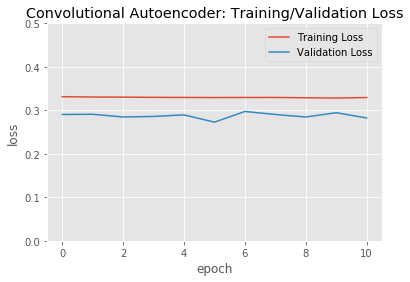

In [437]:
plt.plot(train1.history["loss"], label="Training Loss")
plt.plot(train1.history["val_loss"], label="Validation Loss")
plt.title("Convolutional Autoencoder: Training/Validation Loss")
plt.legend()
plt.ylim(0, 0.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

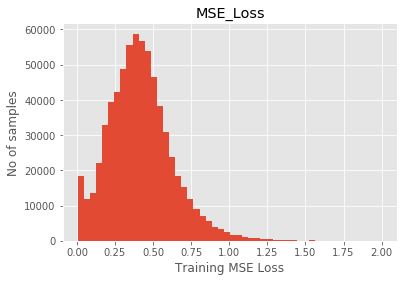

In [427]:
# MSE loss
X_pred = model.predict(X)

train_mse_loss = np.mean(np.power(X_pred - X,2), axis=1)
train_mse_loss = train_mse_loss.reshape((-1))

plt.hist(train_mae_loss, bins=50)
plt.title('MSE_Loss')
plt.xlabel("Training MSE Loss")
plt.ylabel("No of samples")
plt.show()

In [428]:
X[0][0]

array([-0.01630979, -0.52144538,  0.78281043,  0.78281043,  0.78281043,
        0.78281043,  0.78281043,  0.78281043,  0.78281043,  0.78281043,
        0.78281043,  0.78281043,  0.78281043,  0.78281043,  0.78281043,
        0.78281043,  0.78281043,  0.78281043,  0.6383222 ,  0.78281043])

In [420]:
X_pred[0][0]

array([0.39679924], dtype=float32)

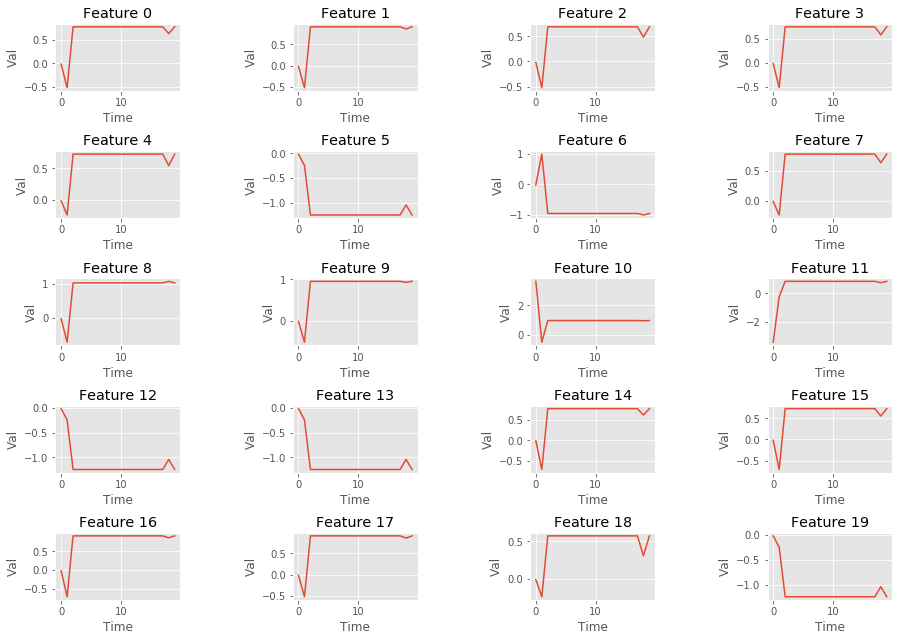

In [418]:
# Checking how the first sequence is learnt
k = 1

seq_learn = plt.figure(figsize=(15,10))
for i in range(0,X.shape[1]):
    # Draw the plot
    seq = seq_learn.add_subplot(5,4,k)
    k += 1
    seq.plot(X[0][i], label='X')
    seq.plot(X_pred[0][i], label='X_pred')
    seq.set_title('Feature {}'.format(i))
    seq.set_xlabel('Time')
    seq.set_ylabel('Val')
    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.9)
plt.show()

In [398]:
# Test on dpf failure @@testing, correct function out please
dd,ii,F,l,FF,ll = generate_testing(data_tsf)

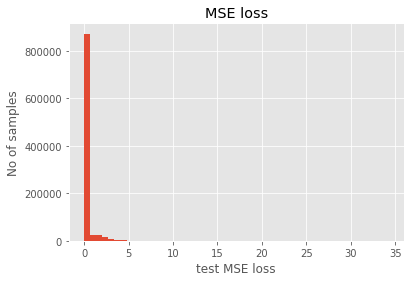

In [417]:
# Get test MSE loss for F
F_pred = model.predict(F)
test_mse_loss = np.mean(np.power(F_pred - F,2), axis=1)
test_mse_loss = test_mse_loss.reshape((-1))

plt.hist(test_mse_loss, bins=50)
plt.title("MSE loss")
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()


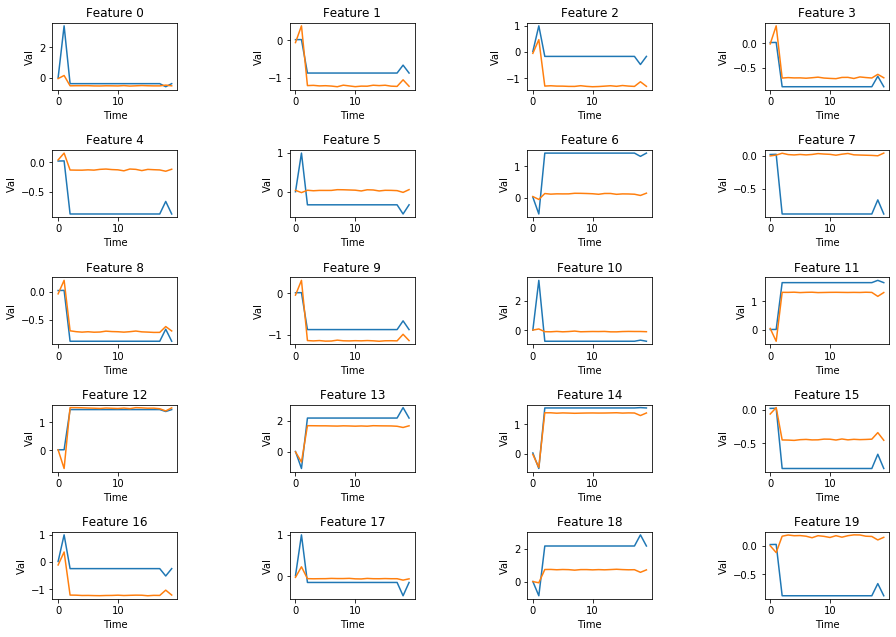

In [127]:
# Checking how the failure is predicted
k = 1

seq_learn = plt.figure(figsize=(15,10))
for i in range(0,F.shape[1]):
    # Draw the plot
    seq = seq_learn.add_subplot(5,4,k)
    k += 1
    seq.plot(F[0][i], label='F')
    seq.plot(F_pred[0][i], label='F_pred')
    seq.set_title('Feature {}'.format(i))
    seq.set_xlabel('Time')
    seq.set_ylabel('Val')
    
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.9)
plt.show()

In [52]:
data_tsf.index.levels[0]

Int64Index([  309450,   308374, 10315963, 10314364,   307112, 10312983,
              308049,   310201,   303576,   302332,
            ...
            10316090, 10316091, 10316092, 10318585, 10318587, 10318588,
            10320987, 10321025, 10321057, 10325986],
           dtype='int64', length=161)

### LSTM

In [128]:
epochs = 100
batch_size = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

model2 = keras.Sequential()
model2.add(keras.layers.LSTM(20, kernel_initializer='he_uniform', batch_input_shape=(None, X.shape[1], X.shape[2]), return_sequences=True, name='encoder_1'))
model2.add(keras.layers.LSTM(5, kernel_initializer='he_uniform', return_sequences=False, name='encoder_2'))
model2.add(keras.layers.RepeatVector(X.shape[1], name='encoder_decoder_bridge'))
model2.add(keras.layers.LSTM(5, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model2.add(keras.layers.LSTM(20, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model2.add(keras.layers.TimeDistributed(keras.layers.Dense(X.shape[2])))
model2.compile(loss="mse",optimizer='adam')
model2.build()
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (LSTM)             (None, 20, 20)            3280      
_________________________________________________________________
encoder_2 (LSTM)             (None, 5)                 520       
_________________________________________________________________
encoder_decoder_bridge (Repe (None, 20, 5)             0         
_________________________________________________________________
decoder_2 (LSTM)             (None, 20, 5)             220       
_________________________________________________________________
decoder_3 (LSTM)             (None, 20, 20)            2080      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 20, 20)            420       
Total params: 6,520
Trainable params: 6,520
Non-trainable params: 0
____________________________________________________

In [50]:
train2 = model2.fit(x=X, y=y, validation_data=(XX, yy), epochs=100, batch_size=batch_size, shuffle=True, callbacks=[early_stop])

Epoch 1/100
340/340 [==============================] - 19s 56ms/step - loss: 0.8570 - val_loss: 0.7970
Epoch 2/100
340/340 [==============================] - 19s 57ms/step - loss: 0.7946 - val_loss: 0.7650
Epoch 3/100
340/340 [==============================] - 17s 49ms/step - loss: 0.7584 - val_loss: 0.7619
Epoch 4/100
340/340 [==============================] - 17s 49ms/step - loss: 0.7281 - val_loss: 0.7262
Epoch 5/100
340/340 [==============================] - 16s 47ms/step - loss: 0.6973 - val_loss: 0.6468
Epoch 6/100
340/340 [==============================] - 17s 50ms/step - loss: 0.6146 - val_loss: 0.5798
Epoch 7/100
340/340 [==============================] - 16s 47ms/step - loss: 0.5662 - val_loss: 0.5502
Epoch 8/100
340/340 [==============================] - 16s 47ms/step - loss: 0.5365 - val_loss: 0.5374
Epoch 9/100
340/340 [==============================] - 17s 50ms/step - loss: 0.5136 - val_loss: 0.5030
Epoch 10/100
340/340 [==============================] - 17s 49ms/step - l

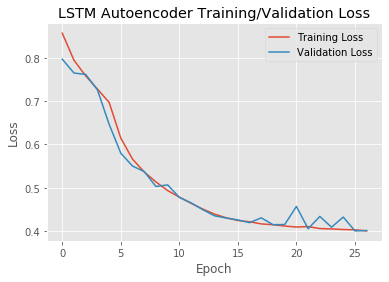

In [436]:
plt.plot(train2.history["loss"], label="Training Loss")
plt.plot(train2.history["val_loss"], label="Validation Loss")
plt.title("LSTM Autoencoder Training/Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

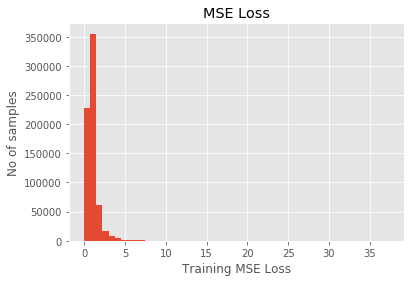

In [424]:
# MSE loss
X_pred = model2.predict(X)
train_mse_loss = np.mean(np.power(X_pred - X,2), axis=1)
train_mse_loss = train_mse_loss.reshape((-1))

plt.hist(train_mse_loss, bins=50)
plt.title("MSE Loss")
plt.xlabel("Training MSE Loss")
plt.ylabel("No of samples")
plt.show()


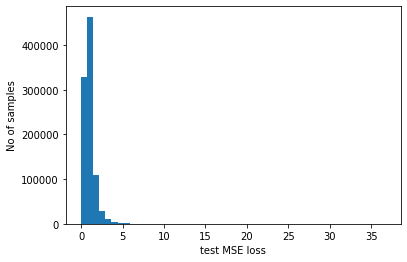

In [404]:
# Get test MAE loss for F
F_pred = model2.predict(F)
test_mse_loss = np.mean(np.power(F_pred - F,2), axis=1)
test_mse_loss = test_mse_loss.reshape((-1))

plt.hist(test_mse_loss, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()



### Following the guide

In [340]:
# Following the guide Prof. Lloyd provided
from keras import regularizers
from keras.models import Model, load_model

nb_epoch = 200
batch_size = 128
input_dim = X.shape[1] #num of features
encoding_dim = 20
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

input_layer = layers.Input(shape=(input_dim, X.shape[2]))
encoder = layers.Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = layers.Dense(hidden_dim, activation="relu")(encoder)
decoder = layers.Dense(hidden_dim, activation="relu")(encoder)
decoder = layers.Dense(encoding_dim, activation="relu")(decoder)
decoder = layers.Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 20, 20)]          0         
_________________________________________________________________
dense_25 (Dense)             (None, 20, 20)            420       
_________________________________________________________________
dense_26 (Dense)             (None, 20, 10)            210       
_________________________________________________________________
dense_27 (Dense)             (None, 20, 10)            110       
_________________________________________________________________
dense_28 (Dense)             (None, 20, 20)            220       
_________________________________________________________________
dense_29 (Dense)             (None, 20, 20)            420       
Total params: 1,380
Trainable params: 1,380
Non-trainable params: 0
____________________________________________________

In [392]:
from keras.callbacks import ModelCheckpoint, TensorBoard

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')
cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)
tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)
history = autoencoder.fit(X, X,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(XX, XX),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/200
265/265 [==============================] - 2s 7ms/step - loss: 0.0079 - accuracy: 0.7060 - val_loss: 0.0067 - val_accuracy: 0.7224
Epoch 2/200
265/265 [==============================] - 1s 5ms/step - loss: 0.0059 - accuracy: 0.7545 - val_loss: 0.0050 - val_accuracy: 0.7440
Epoch 3/200
265/265 [==============================] - 1s 5ms/step - loss: 0.0045 - accuracy: 0.7316 - val_loss: 0.0041 - val_accuracy: 0.7400
Epoch 4/200
265/265 [==============================] - 2s 7ms/step - loss: 0.0037 - accuracy: 0.7154 - val_loss: 0.0041 - val_accuracy: 0.6946
Epoch 5/200
265/265 [==============================] - 2s 7ms/step - loss: 0.0032 - accuracy: 0.7122 - val_loss: 0.0030 - val_accuracy: 0.6977
Epoch 6/200
265/265 [==============================] - 2s 6ms/step - loss: 0.0030 - accuracy: 0.7079 - val_loss: 0.0033 - val_accuracy: 0.7091


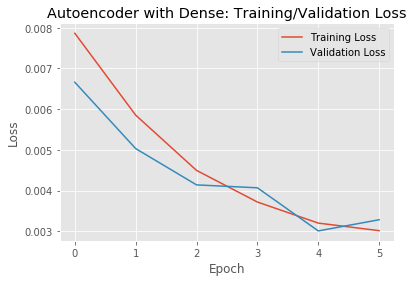

In [435]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Autoencoder with Dense: Training/Validation Loss")
plt.legend()
plt.show()

In [371]:
XX_pred = autoencoder.predict(XX)
mse = np.mean(np.power(XX - XX_pred, 2), axis=1)

In [372]:
def mse_sum(mse):
    mse_sum=[]
    for i in range(0,mse.shape[0]):
        mse_sum.append(np.sum(mse[i]))
    len(mse_sum)
    return mse_sum

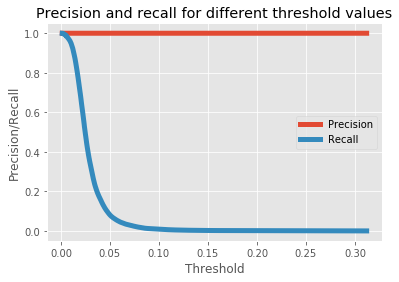

In [426]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

ms = mse_sum(mse)

error_df = pd.DataFrame({'Reconstruction_error': ms, 'True_class': [1]*len(ms)})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

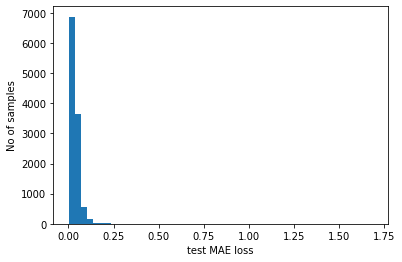

In [376]:
plt.hist(ms, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()



In [350]:
A, l = generate_all_testing(data_tsf)

In [ ]:
A_pred = autoencoder.predict(A)
mse = np.mean(np.power(A - A_pred, 2), axis=1)
ms = mse_sum(mse)

error_df_test = pd.DataFrame({'Reconstruction_error': ms,
                        'True_class': dpf_classes})

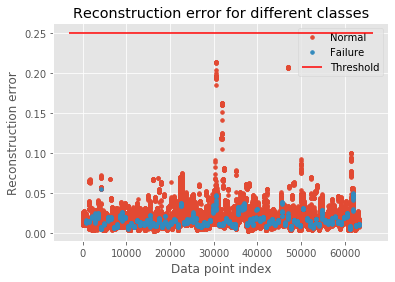

In [434]:
A_pred = autoencoder.predict(A)
mse = np.mean(np.power(A - A_pred, 2), axis=1)
ms = mse_sum(mse)

error_df_test = pd.DataFrame({'Reconstruction_error': ms,
                        'True_class': dpf_classes})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.25
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Failure" if name == 1 else "Normal")
    
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [386]:
import seaborn as sns

classes = ['Normal','Failure']

y_pred = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

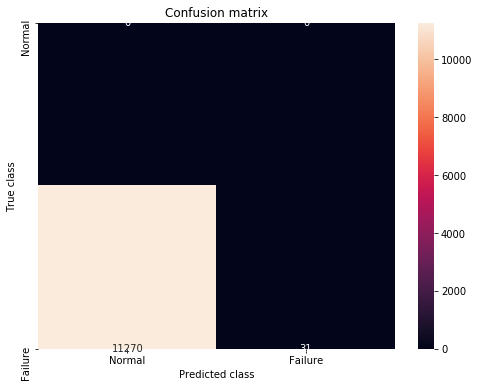

In [378]:
conf_matrix = confusion_matrix(error_df_Test.True_class, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()